Medical records of 270 patients have been provided in the file.

1) Find out variable importance using Decision Tree classifier to predict heart disease<br>
2-a) Train a decision tree model to predict heart disease using only the top 5 important variables. Use entire data for training<br>
2-b) What is the accuracy of the model with 5 fold cross validation

Data dictionary:

S No	Type	Name	Description<br>
1	real	age	age of patient<br>
2	binary	sex	sex of patient<br>
3	nominal	chest_pain_type	chest pain type  (4 values)<br>
4	real	BP	resting blood pressure<br>
5	real	cholestrol	serum cholestoral in mg/dl<br>
6	binary	bloodsugarlevel	fasting blood sugar > 120 mg/dl<br>
7	nominal	ECG_result	resting electrocardiographic results  (values 0,1,2)<br>
8	real	Max_heart_rate	maximum heart rate achieved<br>
9	binary	Angina	exercise induced angina<br>
10	real	oldpeak 	oldpeak = ST depression induced by exercise relative to rest<br>
11	oridnal	slopepeak	the slope of the peak exercise ST segment<br>
12	real	major_vessels	number of major vessels (0-3) colored by flourosopy<br>
13	nominal	thal	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

pd.set_option('display.max_columns', None)

In [2]:
# Load data
heart_disease = pd.read_excel('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Tree-Based-Models-main/04_heart_disease.xlsx', sheet_name='data')
heart_disease.head()

,age,sex,chest_pain_type,BP,cholestrol,bloodsugarlevel,ECG_result,Max_heart_rate,Angina,oldpeak,slopepeak,major_vessels,thal,disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


We have the following variables categorical. But these are stored as numeric. Hence we should convert them to dummy variables.
- sex
- chest_pain_type
- bloodsugarlevel
- ECG_result
- Angina
- slopepeak
- thal

In [3]:
# Create dummies
cat_cols = ['sex','chest_pain_type','bloodsugarlevel','ECG_result','Angina','slopepeak','thal']
heart_disease_onehot = pd.get_dummies(heart_disease, columns=cat_cols)

heart_disease_onehot.sample(5)

,age,BP,cholestrol,Max_heart_rate,oldpeak,major_vessels,disease,sex_0,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,bloodsugarlevel_0,bloodsugarlevel_1,ECG_result_0,ECG_result_1,ECG_result_2,Angina_0,Angina_1,slopepeak_1,slopepeak_2,slopepeak_3,thal_3,thal_6,thal_7
219,44,120,220,170,0.0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0
179,50,129,196,163,0.0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0
190,54,140,239,160,1.2,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0
88,41,126,306,163,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0
197,54,110,214,158,1.6,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0


In [4]:
# Fit the model
X = heart_disease_onehot.drop('disease', axis=1)
y = heart_disease_onehot['disease']

clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X,y)

[Ellipsis]

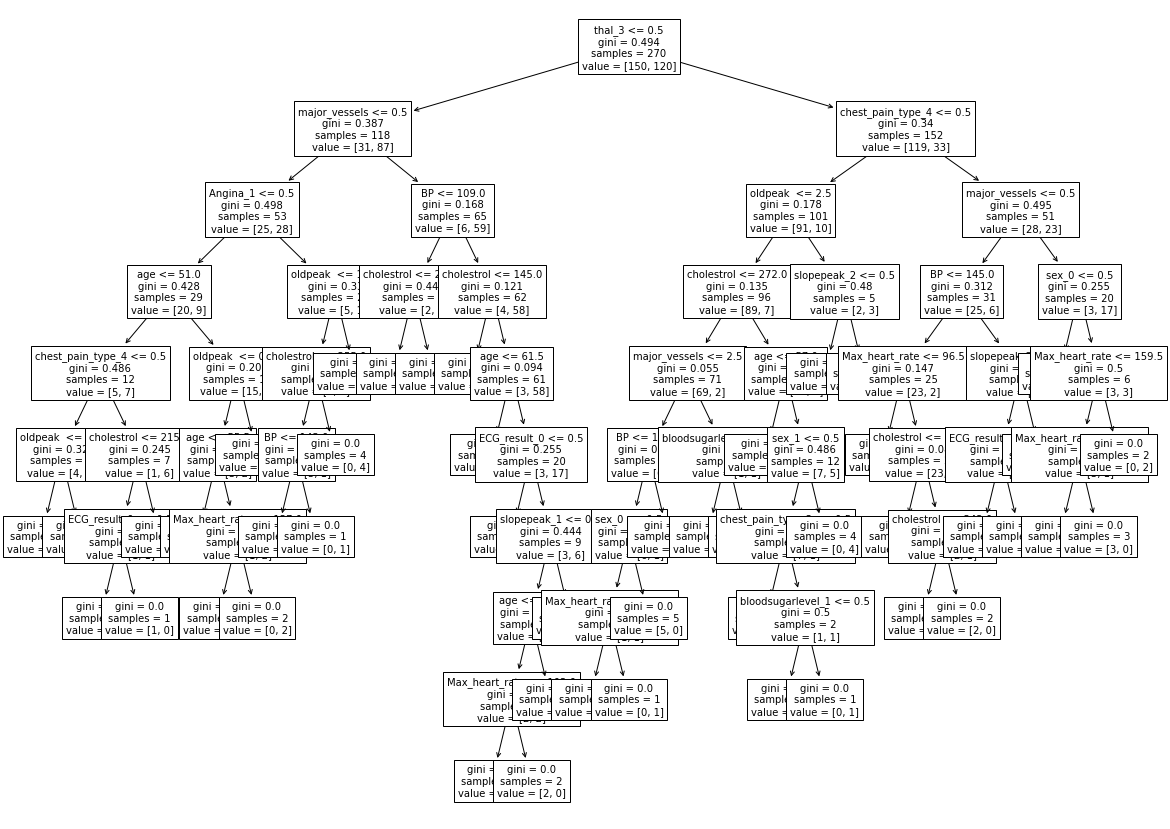

In [5]:
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names=X.columns, fontsize=10)
[...]

In [6]:
# Feature importance
feature_imp = pd.Series(clf.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=False,inplace=True)
feature_imp

thal_3               0.269628
major_vessels        0.148487
chest_pain_type_4    0.081865
cholestrol           0.076263
Max_heart_rate       0.068225
oldpeak              0.062150
age                  0.059170
BP                   0.054969
Angina_1             0.045635
sex_1                0.030625
slopepeak_2          0.028000
ECG_result_0         0.025750
sex_0                0.021107
bloodsugarlevel_1    0.015000
slopepeak_1          0.007500
chest_pain_type_2    0.005625
slopepeak_3          0.000000
thal_6               0.000000
bloodsugarlevel_0    0.000000
Angina_0             0.000000
ECG_result_2         0.000000
ECG_result_1         0.000000
chest_pain_type_3    0.000000
chest_pain_type_1    0.000000
thal_7               0.000000
dtype: float64

In [7]:
# Top 5 features
top_5 = list(feature_imp.index[:5])
top_5

['thal_3',
 'major_vessels',
 'chest_pain_type_4',
 'cholestrol',
 'Max_heart_rate']

In [8]:
# Train the model using only top 5 features
X = heart_disease_onehot[top_5]
y = heart_disease_onehot['disease']

clf2 = DecisionTreeClassifier(criterion='gini')
clf2 = clf2.fit(X,y)

In [9]:
# Accuracy
clf2.score(X,y)*100

100.0

Accuracy on the entire training set without cross validation is 100%, indicating it is overfitting on the training data.

In [10]:
# With cross validation
clf3 = DecisionTreeClassifier(random_state=42)

# Create parameter grid
params = {'criterion': ['gini'],'max_depth' : [2, 3, 5, 10, 20], 'min_samples_split' : [5, 10, 15, 20, 25, 30, 35, 40]}

# Create 5 fold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create gridsearch object
gs = GridSearchCV(estimator=clf3, cv=folds, param_grid=params)

# Fit the model
gs.fit(X,y)

# Print best score
print('Best Train Score:', np.round(gs.best_score_*100, 2))

Best Train Score: 80.37


We can see that after doing cross validation, the training score decreased to 80% and thereby reducing the overfitting. Cross validation is important in training the model.

[Ellipsis]

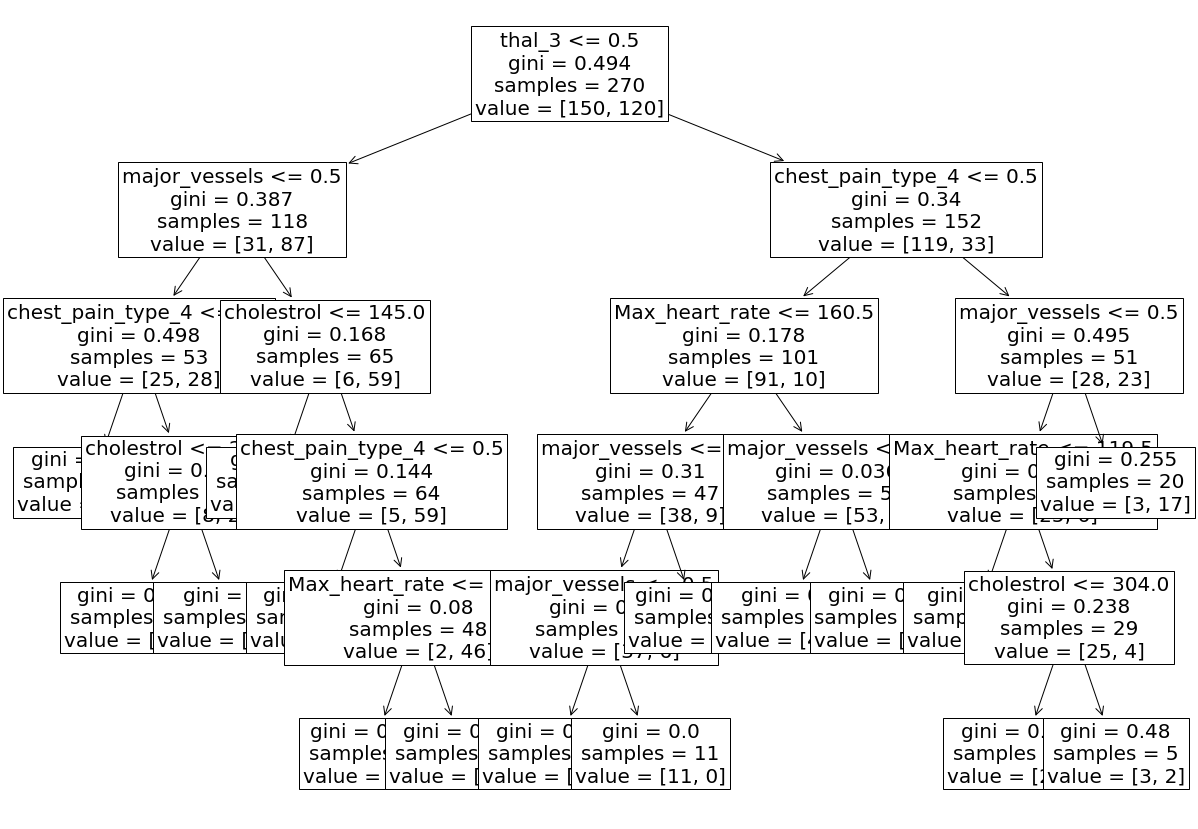

In [11]:
plt.figure(figsize=(20,15))
plot_tree(gs.best_estimator_, feature_names=X.columns, fontsize=20)
[...]